<a href="https://colab.research.google.com/github/Mansoldo/mod14_visualization_seaborn/blob/main/mod14_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática - Seaborn

##**Módulo 14** - Visualização de dados I<br>
[Diego Mansoldo](https://www.linkedin.com.br/in/diegomansoldo)

Nesta tarefa, iremos praticar 3 exercícios.

Você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraído do gráfico.

Serão utiizadas duas bases:

*   diamonds
*   flights

Os questionamentos são:
<br>
1. Preço do diamante por tipo de corte
<br>
2. Número de passageiros em dezembro por ano
<br>
3. Número de passageiros por mês entre 1949 e 1959


## 1. Load das bases

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Conferindo bases próprias do seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
# Verificando o database de diamonds
data_diamonds = sns.load_dataset('diamonds')

# Conferindo os 5 primeiros elementos da base de diamonds
data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Carregando o de vôos
data_flights = sns.load_dataset('flights')

# Conferindo os 5 primeiros elementos
data_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### 1.1 - Preço do diamante por tipo de corte

In [13]:
# Calcula o preço médio
mean_price_by_cut = data_diamonds.groupby('cut')['price'].mean().reset_index()

<ipython-input-13-f2809113d011>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_cut = data_diamonds.groupby('cut')['price'].mean().reset_index()


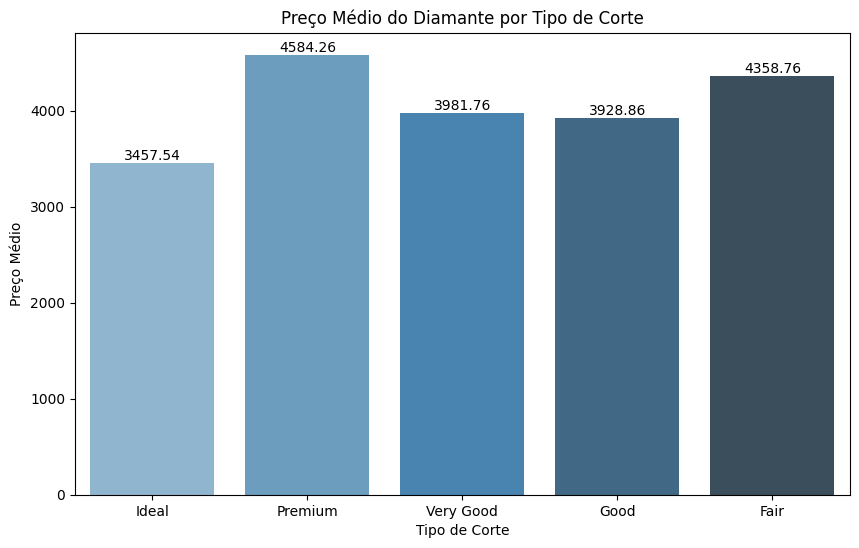

In [18]:
# Construção do gráfico
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x = 'cut', y ='price', hue = 'cut', data = mean_price_by_cut, palette = 'Blues_d')
plt.title('Preço Médio do Diamante por Tipo de Corte')
plt.xlabel('Tipo de Corte')
plt.ylabel('Preço Médio')

for index, row in mean_price_by_cut.iterrows():
  bar_plot.text(row.name, row.price, round(row.price, 2), ha="center", color = 'black', va = "bottom")
plt.show()

### 1.2 - Número de passageiros em dezembro por ano

<ipython-input-38-7f44359acc66>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(data = soma_passageiros, x = 'year', y ='passengers', palette = 'pastel')


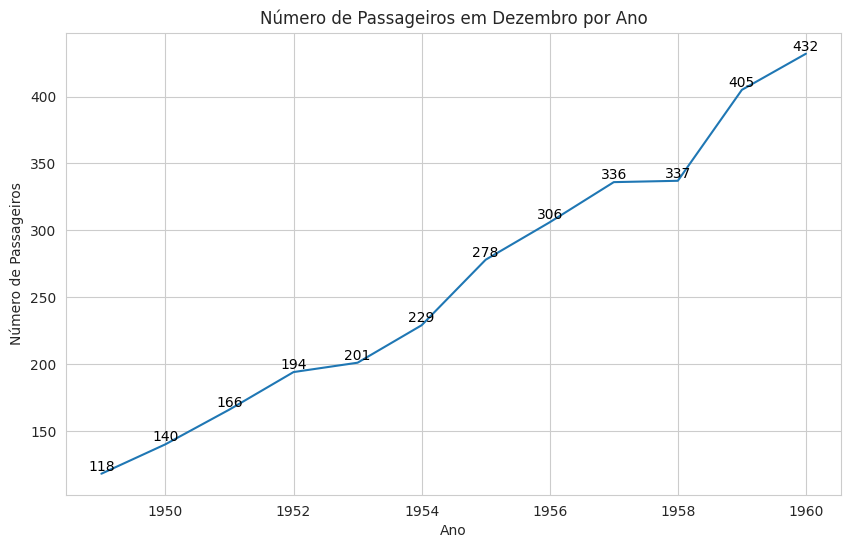

In [38]:
# Filtrando o mês de Dezembro
dezembro_data = data_flights[data_flights['month'] == 'Dec']

# Tamanho do gráfico
plt.figure(figsize=(10,6))

# Soma dos passageiros
soma_passageiros = dezembro_data.groupby('year')['passengers'].sum().reset_index()

# Gerando o gráfico
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data = soma_passageiros, x = 'year', y ='passengers', palette = 'pastel')
  grafico.set(title = 'Número de Passageiros em Dezembro por Ano', xlabel = 'Ano', ylabel = 'Número de Passageiros')

  for x, y in zip(soma_passageiros['year'], soma_passageiros['passengers']):
    plt.text(x,y,f'{y}', color='black', ha='center', va='bottom')

plt.show()

### 1.3 - Número de passageiros por mês entre 1949 e 1959

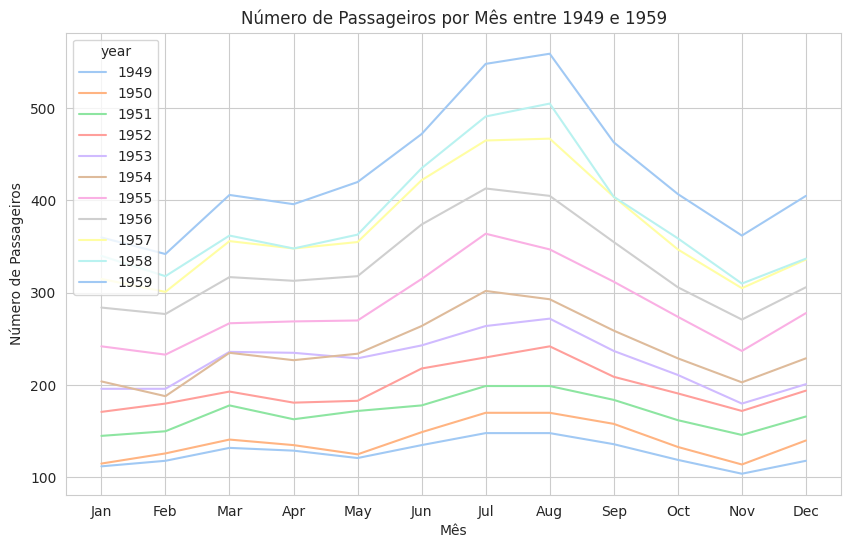

In [45]:
# Filtrando o data
new_data = data_flights.query('year >= 1949 and year <= 1959')

# Tamanho do gráfico
plt.figure(figsize=(10,6))

# Desenhando o gráfico
with sns.axes_style('whitegrid'):
  grafico = sns.lineplot(data = new_data, x = 'month', y ='passengers', hue = 'year', palette = 'pastel')
  grafico.set(title = 'Número de Passageiros por Mês entre 1949 e 1959', xlabel = 'Mês', ylabel = 'Número de Passageiros')